In [1]:
import pandas as pd

In [2]:
#read in data

data = pd.read_csv('final_data.csv').drop('Index',axis=1)

cases = data['clean_cases']
deaths = data['clean_deaths']
predictors = data.loc[:,(data.columns != 'clean_deaths')]

#one-hot encode countries
ohc_country = pd.get_dummies(predictors['Location'])
predictors_with_ohc = pd.concat([predictors, ohc_country], axis=1)

predictors = predictors.loc[:,(predictors.columns != 'Location')]
predictors_with_ohc = predictors_with_ohc.loc[:,(predictors_with_ohc.columns != 'Location')]

In [3]:
#select training data as 2019 and prediction data as 2020
train_2019 = predictors_with_ohc[predictors_with_ohc['Period'] == 2019]
answer_2019 = deaths[predictors_with_ohc['Period'] == 2019]
test_2020 = predictors_with_ohc[predictors_with_ohc['Period'] == 2020]
answer_2020 = deaths[predictors_with_ohc['Period'] == 2020]

## OHC 

In [4]:
#sections henceforth are named based on the models outlined in the slides

#created linear regression model
from sklearn import linear_model

ohc_linear_regression = linear_model.LinearRegression().fit(train_2019,answer_2019)

In [5]:
#evaluated model with RMSE
from sklearn import metrics

predictions_2020 = ohc_linear_regression.predict(test_2020)
metrics.mean_squared_error(answer_2020,predictions_2020, squared=False)

1459.062213824653

In [6]:
model_pred = pd.DataFrame(data[data['Period'] == 2020]['Location'])
model_pred['Predicted Deaths'] = predictions_2020.round(0).astype(int)
model_pred['Actual Deaths'] =  data[data['Period'] == 2020]['clean_deaths']
model_pred['Difference'] = model_pred['Predicted Deaths'] - model_pred['Actual Deaths']
model_pred['Percent Difference'] = (100* model_pred['Difference'] / model_pred['Actual Deaths']).round(1)

model_pred = model_pred.sort_values('Actual Deaths')
model_pred

,Location,Predicted Deaths,Actual Deaths,Difference,Percent Difference
0,Algeria,-711,0,-711,-inf
46,Morocco,68,0,68,inf
12,Cabo Verde,76,0,76,inf
6,Botswana,134,4,130,3250.0
50,Namibia,-627,51,-678,-1329.4
22,Eritrea,384,372,12,3.2
26,Gabon,609,385,224,58.2
20,Equatorial Guinea,931,766,165,21.5
32,Guinea-Bissau,1005,969,36,3.7
44,Mauritania,1275,1129,146,12.9


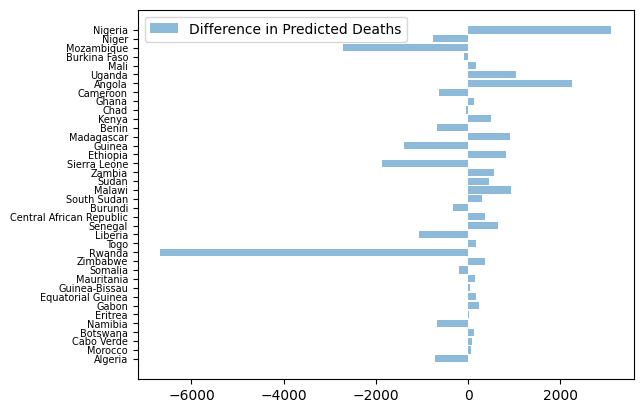

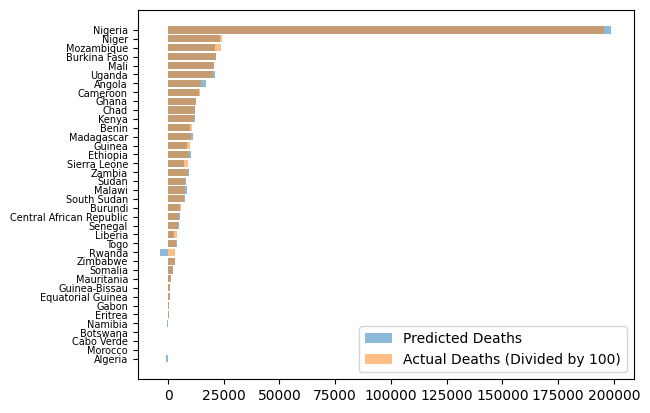

In [7]:
#evaluated model visually
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.barh(model_pred['Location'],model_pred["Difference"], alpha=0.5)
#ax.barh(model_pred['Location'],model_pred["Actual Deaths"]/100, alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Difference in Predicted Deaths"])#,"Actual Deaths (Divided by 100)"])

plt.show()

fig, ax = plt.subplots()


ax.barh(model_pred['Location'],model_pred["Predicted Deaths"], alpha=0.5)
ax.barh(model_pred['Location'],model_pred["Actual Deaths"], alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Predicted Deaths","Actual Deaths (Divided by 100)"])

plt.show()

## OHC (log standardized)

In [8]:
#all code henceforth is reused from the first section and therefore not commented on as thoroughly
import numpy as np

#log standardized variables
log_train_2019 = np.log(predictors_with_ohc[predictors_with_ohc['Period'] == 2019]+1)
log_answer_2019 = np.log(deaths[predictors_with_ohc['Period'] == 2019]+1)
log_test_2020 = np.log(predictors_with_ohc[predictors_with_ohc['Period'] == 2020]+1)

In [9]:
ohc_log_linear_regression = linear_model.LinearRegression().fit(log_train_2019,log_answer_2019)

log_predictions_2020 = ohc_log_linear_regression.predict(log_test_2020)
metrics.mean_squared_error(answer_2020,np.exp(log_predictions_2020), squared=False)

1589.0359415734406

In [10]:
model_pred = pd.DataFrame(data[data['Period'] == 2020]['Location'])
model_pred['Predicted Deaths'] = np.exp(log_predictions_2020).round(0).astype(int)
model_pred['Actual Deaths'] =  data[data['Period'] == 2020]['clean_deaths']
model_pred['Difference'] = model_pred['Predicted Deaths'] - model_pred['Actual Deaths']
model_pred['Percent Difference'] = (100* model_pred['Difference'] / model_pred['Actual Deaths']).round(1)

model_pred = model_pred.sort_values('Actual Deaths')
model_pred

,Location,Predicted Deaths,Actual Deaths,Difference,Percent Difference
0,Algeria,1,0,1,inf
46,Morocco,1,0,1,inf
12,Cabo Verde,1,0,1,inf
6,Botswana,3,4,-1,-25.0
50,Namibia,29,51,-22,-43.1
22,Eritrea,382,372,10,2.7
26,Gabon,373,385,-12,-3.1
20,Equatorial Guinea,734,766,-32,-4.2
32,Guinea-Bissau,983,969,14,1.4
44,Mauritania,1147,1129,18,1.6


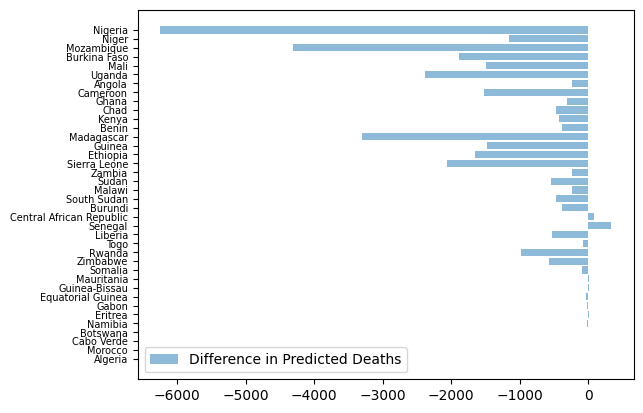

In [11]:
fig, ax = plt.subplots()


ax.barh(model_pred['Location'],model_pred["Difference"], alpha=0.5)
#ax.barh(model_pred['Location'],model_pred["Actual Deaths"]/100, alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Difference in Predicted Deaths"])#,"Actual Deaths (Divided by 100)"])

plt.show()

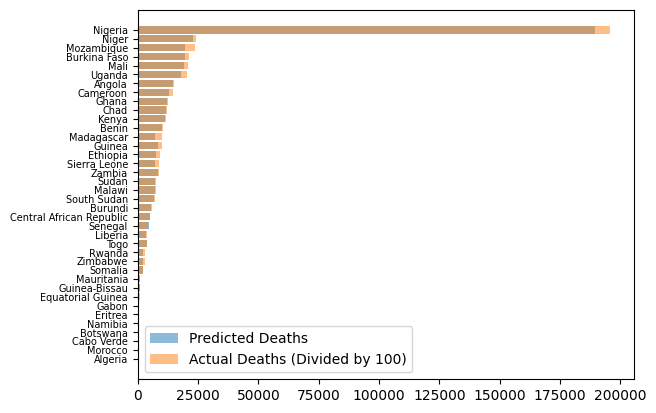

In [12]:
fig, ax = plt.subplots()


ax.barh(model_pred['Location'],model_pred["Predicted Deaths"], alpha=0.5)
ax.barh(model_pred['Location'],model_pred["Actual Deaths"], alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Predicted Deaths","Actual Deaths (Divided by 100)"])

plt.show()

## Country Only

In [53]:
#made predictions with country code only

import numpy as np

predictors_with_ohc_country_only = predictors_with_ohc.iloc[:,[i for i in range(8,46)]+[0]]

log_train_2019 = np.log(predictors_with_ohc_country_only[predictors_with_ohc_country_only['Period'] == 2019]+1)
log_answer_2019 = np.log(deaths[predictors['Period'] == 2019]+1)
log_test_2020 = np.log(predictors_with_ohc_country_only[predictors_with_ohc_country_only['Period'] == 2020]+1)


ohc_log_linear_regression = linear_model.LinearRegression().fit(log_train_2019,log_answer_2019)

log_predictions_2020 = ohc_log_linear_regression.predict(log_test_2020)
print(metrics.mean_squared_error(answer_2020,np.exp(log_predictions_2020), squared=False))


model_pred = pd.DataFrame(data[data['Period'] == 2020]['Location'])
model_pred['Predicted Deaths'] = np.exp(log_predictions_2020).round(0).astype(int)
model_pred['Actual Deaths'] =  data[data['Period'] == 2020]['clean_deaths']
model_pred['Difference'] = model_pred['Predicted Deaths'] - model_pred['Actual Deaths']
model_pred['Percent Difference'] = (100* model_pred['Difference'] / model_pred['Actual Deaths']).round(1)

model_pred = model_pred.sort_values('Actual Deaths')
model_pred

2070.6211247123742


,Location,Predicted Deaths,Actual Deaths,Difference,Percent Difference
0,Algeria,1,0,1,inf
46,Morocco,1,0,1,inf
12,Cabo Verde,1,0,1,inf
6,Botswana,1,4,-3,-75.0
50,Namibia,15,51,-36,-70.6
22,Eritrea,438,372,66,17.7
26,Gabon,385,385,0,0.0
20,Equatorial Guinea,727,766,-39,-5.1
32,Guinea-Bissau,876,969,-93,-9.6
44,Mauritania,1115,1129,-14,-1.2


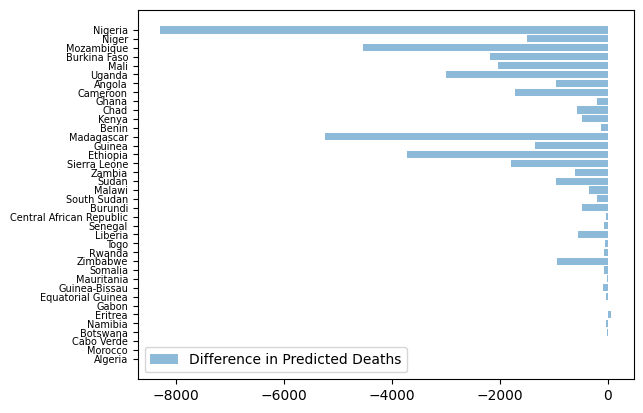

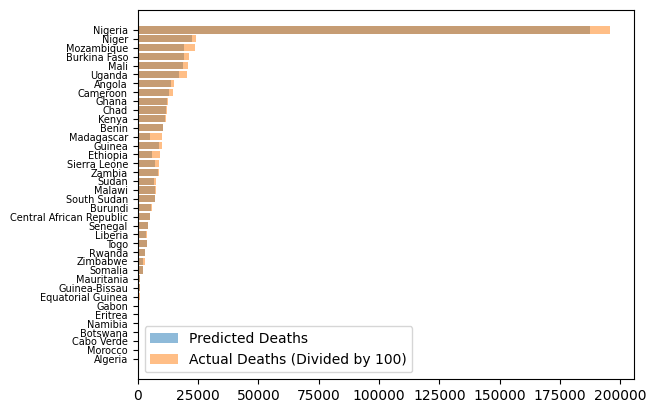

In [54]:
fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Difference"], alpha=0.5)
#ax.barh(model_pred['Location'],model_pred["Actual Deaths"]/100, alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Difference in Predicted Deaths"])#,"Actual Deaths (Divided by 100)"])

plt.show()

fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Predicted Deaths"], alpha=0.5)
ax.barh(model_pred['Location'],model_pred["Actual Deaths"], alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Predicted Deaths","Actual Deaths (Divided by 100)"])

plt.show()

## Cases only

In [58]:
#made prediction with number of cases only

import numpy as np

predictors_with_ohc_cases_only = predictors_with_ohc[['Period','clean_cases']]

log_train_2019 = np.log(predictors_with_ohc_cases_only[predictors_with_ohc_cases_only['Period'] == 2019]+1)
log_answer_2019 = np.log(deaths[predictors['Period'] == 2019]+1)
log_test_2020 = np.log(predictors_with_ohc_cases_only[predictors_with_ohc_cases_only['Period'] == 2020]+1)


ohc_log_linear_regression = linear_model.LinearRegression().fit(log_train_2019,log_answer_2019)

log_predictions_2020 = ohc_log_linear_regression.predict(log_test_2020)
print(metrics.mean_squared_error(answer_2020,np.exp(log_predictions_2020), squared=False))


model_pred = pd.DataFrame(data[data['Period'] == 2020]['Location'])
model_pred['Predicted Deaths'] = np.exp(log_predictions_2020).round(0).astype(int)
model_pred['Actual Deaths'] =  data[data['Period'] == 2020]['clean_deaths']
model_pred['Difference'] = model_pred['Predicted Deaths'] - model_pred['Actual Deaths']
model_pred['Percent Difference'] = (100* model_pred['Difference'] / model_pred['Actual Deaths']).round(1)

model_pred = model_pred.sort_values('Actual Deaths')
model_pred

24186.992602096067


,Location,Predicted Deaths,Actual Deaths,Difference,Percent Difference
0,Algeria,0,0,0,NaN
46,Morocco,0,0,0,NaN
12,Cabo Verde,0,0,0,NaN
6,Botswana,47,4,43,1075.0
50,Namibia,234,51,183,358.8
22,Eritrea,912,372,540,145.2
26,Gabon,2016,385,1631,423.6
20,Equatorial Guinea,1545,766,779,101.7
32,Guinea-Bissau,1026,969,57,5.9
44,Mauritania,1069,1129,-60,-5.3


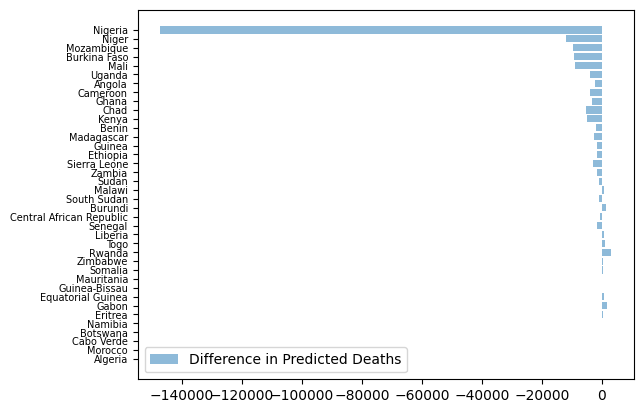

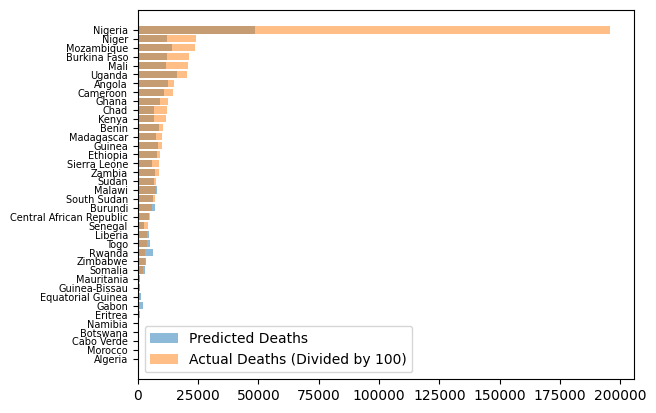

In [59]:
fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Difference"], alpha=0.5)
#ax.barh(model_pred['Location'],model_pred["Actual Deaths"]/100, alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Difference in Predicted Deaths"])#,"Actual Deaths (Divided by 100)"])

plt.show()

fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Predicted Deaths"], alpha=0.5)
ax.barh(model_pred['Location'],model_pred["Actual Deaths"], alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Predicted Deaths","Actual Deaths (Divided by 100)"])

plt.show()

## No OHC

In [13]:
train_2019 = predictors[predictors['Period'] == 2019]
test_2020 = predictors[predictors['Period'] == 2020]

In [14]:
no_ohc_linear_regression = linear_model.LinearRegression().fit(predictors,deaths)

predictions_2020 = no_ohc_linear_regression.predict(test_2020)
metrics.mean_squared_error(answer_2020,predictions_2020, squared=False)

2939.5252195714957

In [15]:
model_pred = pd.DataFrame(data[data['Period'] == 2020]['Location'])
model_pred['Predicted Deaths'] = predictions_2020.round(0).astype(int)
model_pred['Actual Deaths'] =  data[data['Period'] == 2020]['clean_deaths']
model_pred['Difference'] = model_pred['Predicted Deaths'] - model_pred['Actual Deaths']
model_pred['Percent Difference'] = (100* model_pred['Difference'] / model_pred['Actual Deaths']).round(1)

model_pred = model_pred.sort_values('Actual Deaths')
model_pred

,Location,Predicted Deaths,Actual Deaths,Difference,Percent Difference
0,Algeria,300,0,300,inf
46,Morocco,1315,0,1315,inf
12,Cabo Verde,-19,0,-19,-inf
6,Botswana,-393,4,-397,-9925.0
50,Namibia,-1327,51,-1378,-2702.0
22,Eritrea,478,372,106,28.5
26,Gabon,418,385,33,8.6
20,Equatorial Guinea,247,766,-519,-67.8
32,Guinea-Bissau,-2280,969,-3249,-335.3
44,Mauritania,1486,1129,357,31.6


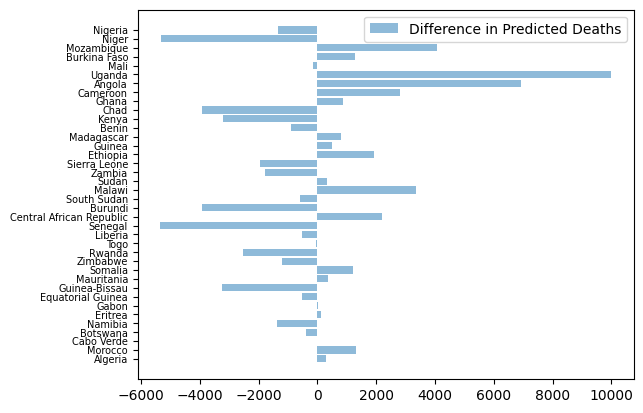

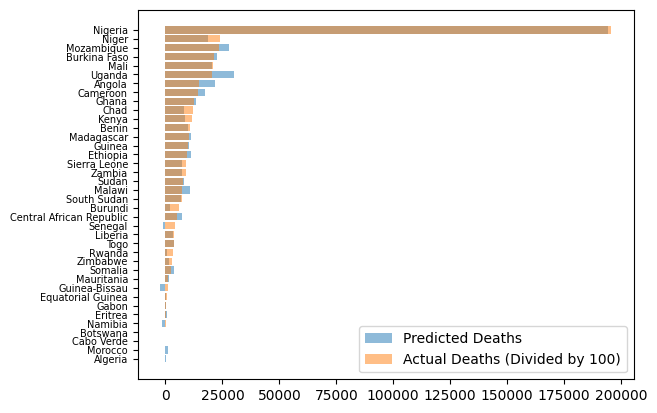

In [16]:
fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Difference"], alpha=0.5)
#ax.barh(model_pred['Location'],model_pred["Actual Deaths"]/100, alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Difference in Predicted Deaths"])#,"Actual Deaths (Divided by 100)"])

plt.show()

fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Predicted Deaths"], alpha=0.5)
ax.barh(model_pred['Location'],model_pred["Actual Deaths"], alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Predicted Deaths","Actual Deaths (Divided by 100)"])

plt.show()

## No OHC (log standardized)

In [17]:
log_train_2019 = np.log(predictors[predictors['Period'] == 2019]+1)
log_test_2020 = np.log(predictors[predictors['Period'] == 2020]+1)

In [18]:
no_ohc_log_linear_regression = linear_model.LinearRegression().fit(log_train_2019,log_answer_2019)

log_predictions_2020 = no_ohc_log_linear_regression.predict(log_test_2020)
metrics.mean_squared_error(answer_2020,np.exp(log_predictions_2020), squared=False)

4900.113533932706

In [19]:
model_pred = pd.DataFrame(data[data['Period'] == 2020]['Location'])
model_pred['Predicted Deaths'] = np.exp(log_predictions_2020).round(0).astype(int)
model_pred['Actual Deaths'] =  data[data['Period'] == 2020]['clean_deaths']
model_pred['Difference'] = model_pred['Predicted Deaths'] - model_pred['Actual Deaths']
model_pred['Percent Difference'] = (100* model_pred['Difference'] / model_pred['Actual Deaths']).round(1)

model_pred = model_pred.sort_values('Actual Deaths')
model_pred

,Location,Predicted Deaths,Actual Deaths,Difference,Percent Difference
0,Algeria,1,0,1,inf
46,Morocco,1,0,1,inf
12,Cabo Verde,0,0,0,NaN
6,Botswana,9,4,5,125.0
50,Namibia,43,51,-8,-15.7
22,Eritrea,626,372,254,68.3
26,Gabon,368,385,-17,-4.4
20,Equatorial Guinea,1717,766,951,124.2
32,Guinea-Bissau,717,969,-252,-26.0
44,Mauritania,543,1129,-586,-51.9


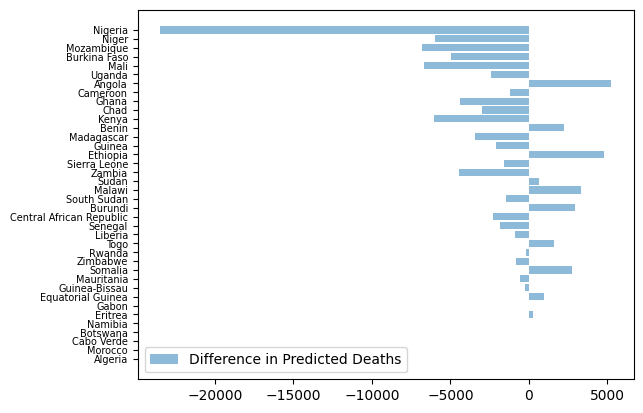

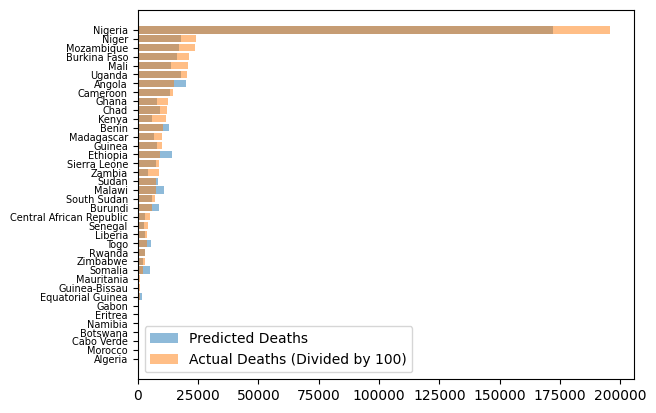

In [20]:
fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Difference"], alpha=0.5)
#ax.barh(model_pred['Location'],model_pred["Actual Deaths"]/100, alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Difference in Predicted Deaths"])#,"Actual Deaths (Divided by 100)"])

plt.show()

fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Predicted Deaths"], alpha=0.5)
ax.barh(model_pred['Location'],model_pred["Actual Deaths"], alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Predicted Deaths","Actual Deaths (Divided by 100)"])

plt.show()

## No cases

In [21]:
#made predictions without case information
no_case_predictors = predictors.iloc[:,[0,2,3,4,5,6,7]]

train_2019 = no_case_predictors[no_case_predictors['Period'] == 2019]
test_2020 = no_case_predictors[no_case_predictors['Period'] == 2020]

no_ohc_linear_regression = linear_model.LinearRegression().fit(no_case_predictors,deaths)

predictions_2020 = no_ohc_linear_regression.predict(test_2020)
print(metrics.mean_squared_error(answer_2020,predictions_2020, squared=False))


model_pred = pd.DataFrame(data[data['Period'] == 2020]['Location'])
model_pred['Predicted Deaths'] = predictions_2020.round(0).astype(int)
model_pred['Actual Deaths'] =  data[data['Period'] == 2020]['clean_deaths']
model_pred['Difference'] = model_pred['Predicted Deaths'] - model_pred['Actual Deaths']
model_pred['Percent Difference'] = (100* model_pred['Difference'] / model_pred['Actual Deaths']).round(1)

model_pred = model_pred.sort_values('Actual Deaths')
model_pred

13635.216424200988


,Location,Predicted Deaths,Actual Deaths,Difference,Percent Difference
0,Algeria,8980,0,8980,inf
46,Morocco,6764,0,6764,inf
12,Cabo Verde,-13011,0,-13011,-inf
6,Botswana,-10267,4,-10271,-256775.0
50,Namibia,-6444,51,-6495,-12735.3
22,Eritrea,-6498,372,-6870,-1846.8
26,Gabon,-11816,385,-12201,-3169.1
20,Equatorial Guinea,5165,766,4399,574.3
32,Guinea-Bissau,-3520,969,-4489,-463.3
44,Mauritania,-2203,1129,-3332,-295.1


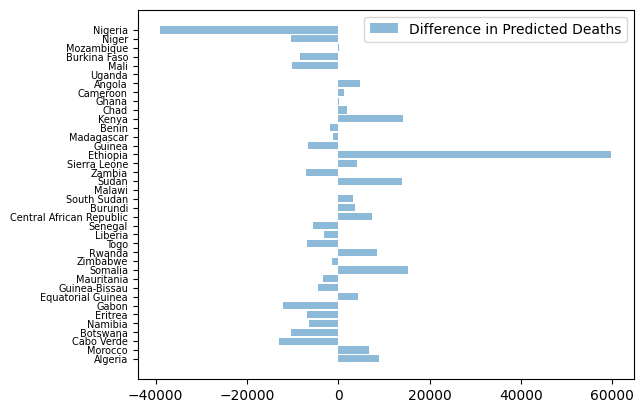

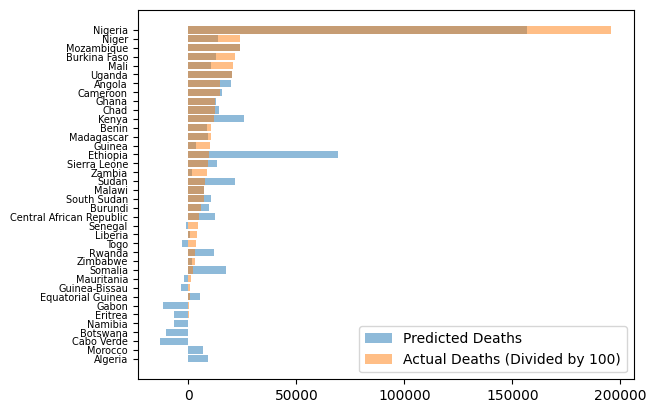

In [22]:
fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Difference"], alpha=0.5)
#ax.barh(model_pred['Location'],model_pred["Actual Deaths"]/100, alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Difference in Predicted Deaths"])#,"Actual Deaths (Divided by 100)"])

plt.show()

fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Predicted Deaths"], alpha=0.5)
ax.barh(model_pred['Location'],model_pred["Actual Deaths"], alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Predicted Deaths","Actual Deaths (Divided by 100)"])

plt.show()

## No cases (log standardized)

In [33]:
no_case_predictors = predictors.iloc[:,[0,2,3,4,5,6,7]]

log_train_2019 = np.log(no_case_predictors[no_case_predictors['Period'] == 2019]+1)
log_test_2020 = np.log(no_case_predictors[no_case_predictors['Period'] == 2020]+1)

no_ohc_linear_regression = linear_model.LinearRegression().fit(log_train_2019,log_answer_2019)

predictions_2020 = np.exp(no_ohc_linear_regression.predict(log_test_2020))
print(metrics.mean_squared_error(answer_2020,predictions_2020, squared=False))


model_pred = pd.DataFrame(data[data['Period'] == 2020]['Location'])
model_pred['Predicted Deaths'] = predictions_2020.round(0).astype(int)
model_pred['Actual Deaths'] =  data[data['Period'] == 2020]['clean_deaths']
model_pred['Difference'] = model_pred['Predicted Deaths'] - model_pred['Actual Deaths']
model_pred['Percent Difference'] = (100* model_pred['Difference'] / model_pred['Actual Deaths']).round(1)

model_pred = model_pred.sort_values('Actual Deaths')
model_pred

8069.053278487285


,Location,Predicted Deaths,Actual Deaths,Difference,Percent Difference
0,Algeria,23,0,23,inf
46,Morocco,12,0,12,inf
12,Cabo Verde,3,0,3,inf
6,Botswana,2,4,-2,-50.0
50,Namibia,9,51,-42,-82.4
22,Eritrea,119,372,-253,-68.0
26,Gabon,33,385,-352,-91.4
20,Equatorial Guinea,7527,766,6761,882.6
32,Guinea-Bissau,1131,969,162,16.7
44,Mauritania,188,1129,-941,-83.3


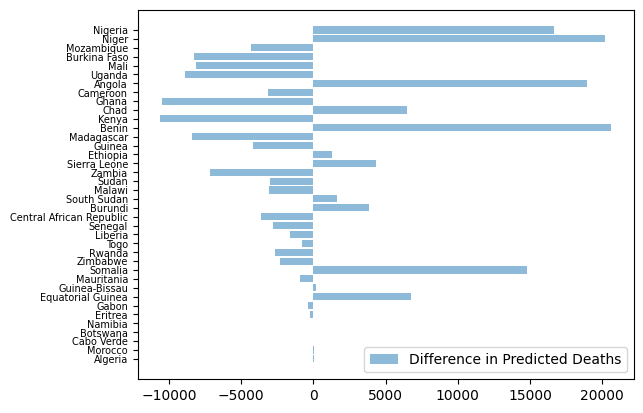

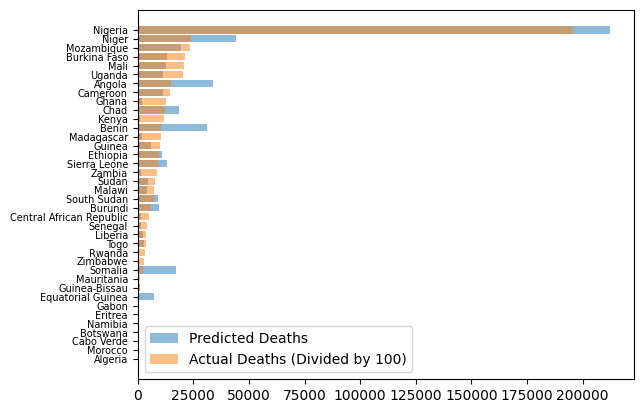

In [34]:
fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Difference"], alpha=0.5)
#ax.barh(model_pred['Location'],model_pred["Actual Deaths"]/100, alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Difference in Predicted Deaths"])#,"Actual Deaths (Divided by 100)"])

plt.show()

fig, ax = plt.subplots()

ax.barh(model_pred['Location'],model_pred["Predicted Deaths"], alpha=0.5)
ax.barh(model_pred['Location'],model_pred["Actual Deaths"], alpha=0.5)
ax.set_yticks(model_pred['Location'],labels=model_pred['Location'], fontsize=7)
ax.legend(["Predicted Deaths","Actual Deaths (Divided by 100)"])

plt.show()